In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile('../Dados/ANDA_2018_2019_2020_anonimizado.xlsx')
df_2018 = pd.read_excel(xls, '2018')
df_2019 = pd.read_excel(xls, '2019')
df_2020 = pd.read_excel(xls, '2020')

In [59]:
import geopandas

df = geopandas.read_file("../Dados/andante_geo_2019.geojson")

ModuleNotFoundError: No module named 'geopandas'

In [45]:
frames = [df_2018, df_2019, df_2020]

data_df = pd.concat(frames)

In [46]:
r, c = data_df.shape
print("Rows:", r, "Columns:", c)

Rows: 1073920 Columns: 33


In [7]:
data_df.columns

Index(['UserHash', 'Fabricante', 'Marca', 'Modelo', 'Versão SO',
       'Modelo Comercial', 'Grupo do Cliente', 'Viagem', 'Hora Início Viagem',
       'Hora Fim Viagem', 'Paragem Inicio Viagem', 'Paragem Fim Viagem',
       'Zona de Início Viagem', 'Zona de Fim Viagem', 'Paragem Única',
       'Sem Meio de Pagamento', 'Modo de Finalização', 'Etapa', 'Operador',
       'Veiculo', 'Linha', 'Sentido', 'Hora Início Etapa', 'Hora Fim Etapa',
       'Paragem Inicio Etapa', 'Paragem Fim Etapa', 'Zona de Início Etapa',
       'Zona de Fim Etapa', 'Grupo de Título', 'Perfil Social',
       'Número de Zonas', 'Lista de Zonas', 'Resultado do Processamento'],
      dtype='object')

In [8]:
data_df[["Paragem Fim Etapa", "Paragem Fim Viagem"]]

,Paragem Fim Etapa,Paragem Fim Viagem
0,Trindade,Trindade
1,Gólgota,Gólgota
2,Trindade,Trindade
3,Sra. Hora (Metro),Sra. Hora (Metro)
4,Trindade,Trindade
...,...,...
126532,24 de Agosto,24 de Agosto
126533,Ermesinde,Ermesinde
126534,D.João II (Metro),D.João II (Metro)
126535,S. Mamede,S. Mamede


In [9]:
data_df["Etapa"].value_counts()

E8E19C62-2E64-4985-A2E0-D8B13A9F6C46    2
DEEB14E5-5565-4906-BA8B-8F900104F7FE    2
4EE561A1-76D6-4E3B-A6BD-2B4CB0337763    2
EA3384AF-B3B5-4E44-A371-B7AC93096B2B    2
A438BA11-3B44-47A0-B65D-B49D41231C0A    2
                                       ..
1B4616B7-BB14-4AFD-8ACA-E13A13634FE8    1
98BB2AC9-E335-4836-AE51-37475791FD7E    1
969A78B1-E6C1-40F1-982E-B7FDC13441D3    1
561BDEF7-A86E-4493-9697-AFA83BE421EE    1
02E43467-5CF2-4160-AFEF-0538C81D0255    1
Name: Etapa, Length: 1069859, dtype: int64

In [10]:
data_df["Viagem"].nunique()

1059994

In [11]:
data_df["Viagem"].value_counts()

90DE043C-4409-4F37-AE28-3CAA7C6D8334    6
7C489E28-D945-401C-AFBC-4E2D42FEFA6C    6
4B62416C-CAFE-4F20-84BB-583B6DA6A029    6
66312026-F015-410B-A171-09469C242E28    6
9DAF08C8-503E-4FD7-B458-138A53046B65    5
                                       ..
CE32058B-6F35-497D-AC0D-E4F3FB74A426    1
83A4E0A2-006A-44C3-9C2B-D93800E4A597    1
798C01B5-5D46-4738-9070-886E89553C9E    1
F6E3C142-DD79-4AB8-9E56-2BA75F78B03E    1
893DB2A3-C596-4E17-B75E-26EA8312FC16    1
Name: Viagem, Length: 1059994, dtype: int64

In [12]:
data_df.UserHash.value_counts()

7ccc6054be89f1e1aa1a5130b7c81682de42110d    3303
77381d66c7494713e5939cd5c45c015f9f55f909    2666
d156e73efe49caa923190d899784451681566480    2269
c8ca8586b8a9c18dcf269db5bfa3e03e5f103769    2241
9932eccb97611c50526ce6b1ab201617add53312    2220
                                            ... 
803e97b85a48aee5bc9dc08f4b6572cecdc0bca6       1
4e20a42c9f6cfa23fc16cc3577539d7769cc9b93       1
5f50635db6cfb5bf328e46c7e177099e048eced8       1
7c61cf8a11820fc0f889fb0f48da91de2c48b461       1
3748a3845f9ddf84c22ef2330f24bb8b74cc3a34       1
Name: UserHash, Length: 10022, dtype: int64

* **User Hash** column transformed to numeric **User ID**

In [13]:
data_df['user_id'] = pd.factorize( data_df['UserHash'] )[0]

In [14]:
data_df['user_id'].value_counts()

60      3303
180     2666
243     2269
39      2241
448     2220
        ... 
8148       1
3613       1
9355       1
4903       1
7342       1
Name: user_id, Length: 10022, dtype: int64

* Number of users

In [15]:
data_df['user_id'].nunique()

10022

* Social profile is **NaN** when Group Title is **"Título de Viagem"**

<AxesSubplot:>

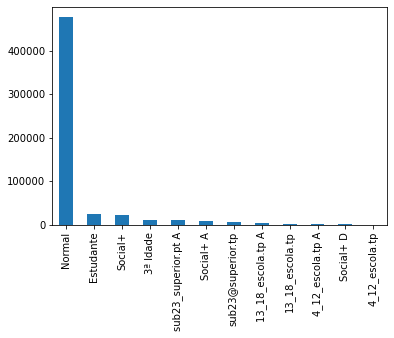

In [16]:
data_df["Perfil Social"].value_counts().plot.bar()

In [17]:
data_df["Resultado do Processamento"].value_counts()

Viagem não partida      1069943
Tarifa não calculada       3977
Name: Resultado do Processamento, dtype: int64

In [18]:
data_df["Grupo do Cliente"].value_counts()

Outros      1069571
Card4B         3956
Novabase        270
Valpi           123
Name: Grupo do Cliente, dtype: int64

In [19]:
data_df["Paragem Única"].value_counts()

Não    927799
Sim    146121
Name: Paragem Única, dtype: int64

In [20]:
data_df["Sem Meio de Pagamento"].value_counts()

Não    1068857
Sim       5063
Name: Sem Meio de Pagamento, dtype: int64

In [21]:
print("Número de Modelos:", data_df["Modelo"].nunique(), "Número de Versão SO:", data_df["Versão SO"].nunique())

Número de Modelos: 493 Número de Versão SO: 2427


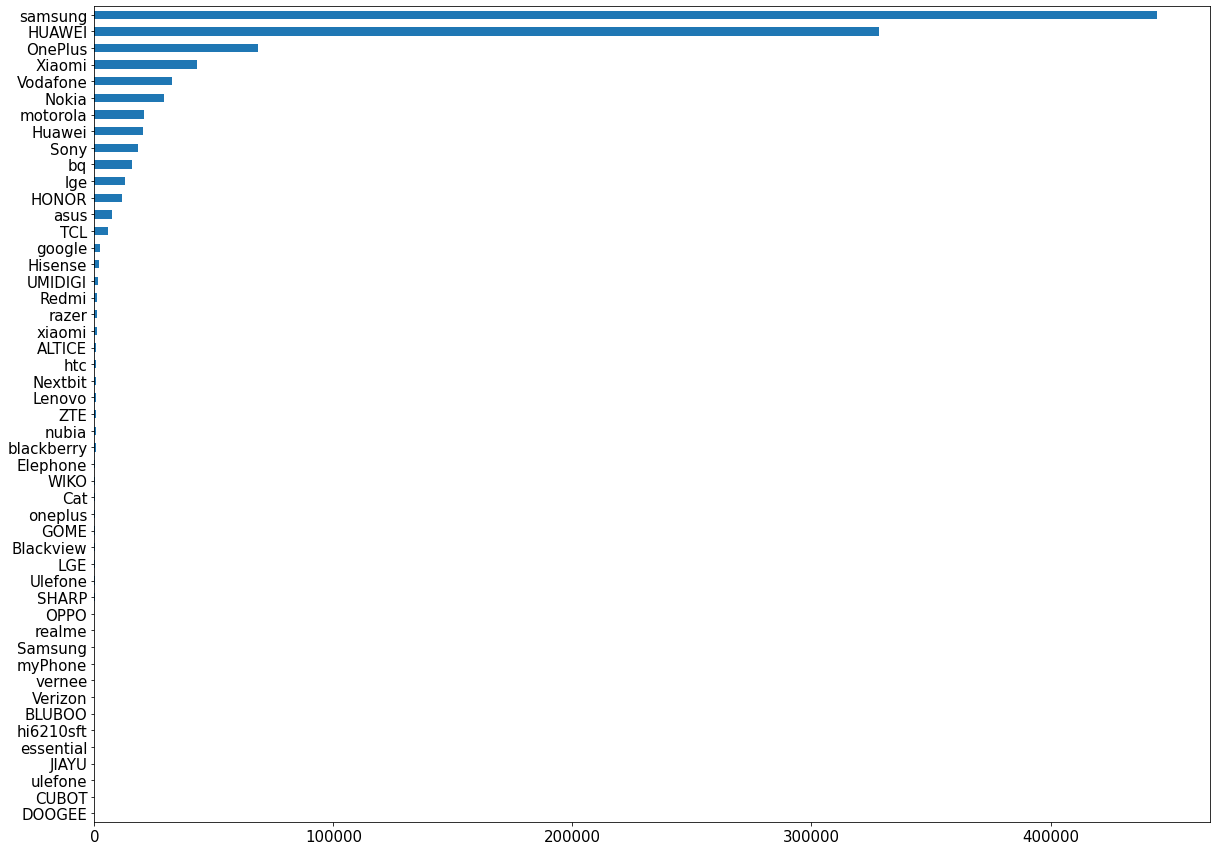

In [22]:
data_df["Marca"].value_counts().plot.barh(figsize=(20,15), fontsize=15).invert_yaxis()

In [23]:
data_df["Modelo"].value_counts()

PRA-LX1         52685
ANE-LX1         47457
FIG-LX1         40901
SM-G950F        38967
WAS-LX1A        31015
                ...  
Armor               1
CPH1979             1
SM-A500F            1
NOS NEVA 80         1
HTC U11 life        1
Name: Modelo, Length: 493, dtype: int64

In [24]:
data_df["Versão SO"].value_counts()

7.0 REL J530FXXU2ARG2       14255
7.1.1 REL J510FNXXU2BRE6    13291
8.0.0 REL 402(C432)         12962
8.0.0 REL G950FXXU3CRGH     12739
7.0 REL G920FXXU6ERF5       11724
                            ...  
7.0 REL C432B506                1
9 REL N970FXXS1ASKB             1
6.0 REL v1B31-0                 1
6.0 REL 1495522287              1
6.0 REL C432B182                1
Name: Versão SO, Length: 2427, dtype: int64

In [25]:
data_df["Modo de Finalização"].value_counts()

Finalização por deteção de passos, não confirmado                353292
Finalização por início de uma nova etapa                         205058
Finalização por timeout não confirmado                           187313
Finalização por deteção de passos, confirmado                     82295
Finalização por tempo com bluetooth desligado excedido            72032
Finalização por novo arranque com viagem em curso                 55372
Finalização por timeout confirmado                                45516
Finalização por timeout na 1ª paragem não confirmado              34014
Finalização por informação repetida não confirmado                18526
Finalização por timeout na 1ª paragem confirmado                  11446
Finalização por informação repetida confirmado                     5563
Finalização manual                                                 2837
Finalização por excesso de ocorrências de bluetooth desligado        54
Finalização por timeout                                         

In [26]:
data_df["Sentido"].value_counts()

Ida         215558
Volta       201385
Circular       554
Name: Sentido, dtype: int64

In [27]:
data_df["Operador"].value_counts()

MP                        604795
STCP                      357380
CP-Porto                   51304
Resende                    17147
Gondomarense               16340
VALPI                      10480
Espírito Santo              9327
OFR                         3311
Maia Transportes            2268
Nogueira da Costa            913
Funicular dos Guindais       571
Rodonorte                     84
Name: Operador, dtype: int64

* In which months had more trips?
* Number of trips by year? Evolution?
* In which seasons there is more trips
* In which hours have more trips?

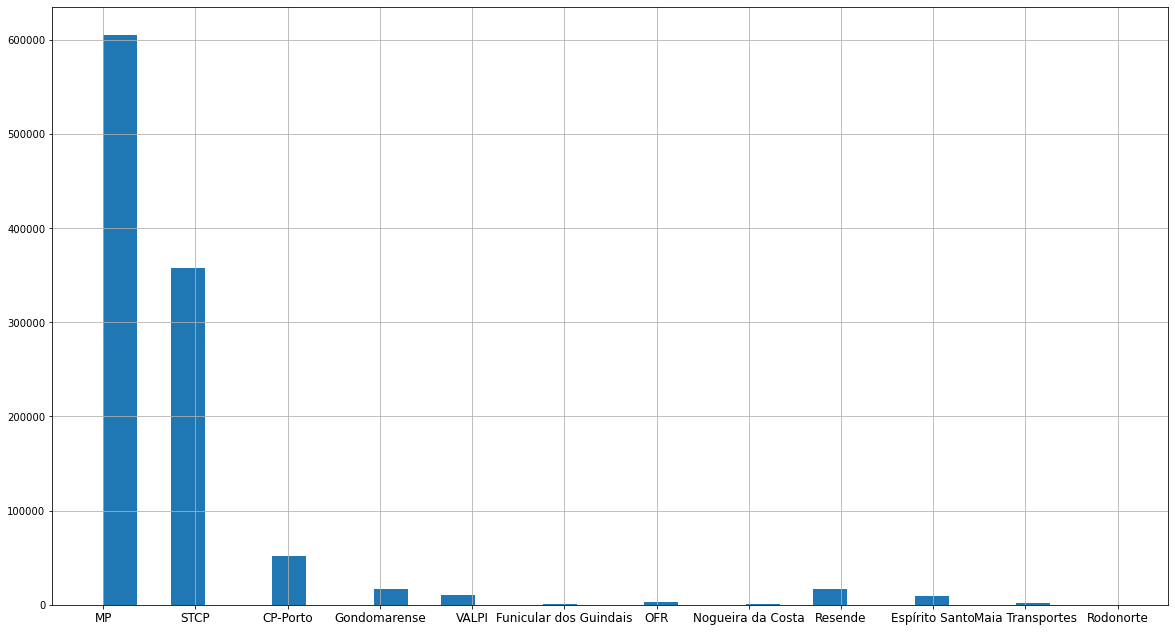

(None,
 MP                        604795
 STCP                      357380
 CP-Porto                   51304
 Resende                    17147
 Gondomarense               16340
 VALPI                      10480
 Espírito Santo              9327
 OFR                         3311
 Maia Transportes            2268
 Nogueira da Costa            913
 Funicular dos Guindais       571
 Rodonorte                     84
 Name: Operador, dtype: int64)

In [28]:
data_df["Operador"].hist(bins=30, figsize=(20,11))
plt.xticks(fontsize=12)
plt.show(), data_df["Operador"].value_counts()

In [29]:
data_df["Hora Início Viagem"] = pd.to_datetime(data_df['Hora Início Viagem'], format="%Y-%m-%d %H:%M:%S")
data_df["Hora Fim Viagem"] = pd.to_datetime(data_df['Hora Início Viagem'], format="%Y-%m-%d %H:%M:%S")

In [30]:
data_df["Ano do Início Viagem"] = data_df["Hora Início Viagem"].dt.year
data_df["Mês do Início Viagem"] = data_df["Hora Início Viagem"].dt.month
data_df["Dia do Início Viagem"] = data_df["Hora Início Viagem"].dt.day

data_df["Hora do Início Viagem"] = data_df["Hora Início Viagem"].dt.hour

In [31]:
data_df["Ano do Fim Viagem"] = data_df["Hora Fim Viagem"].dt.year
data_df["Mês do Fim Viagem"] = data_df["Hora Fim Viagem"].dt.month
data_df["Dia do Fim Viagem"] = data_df["Hora Fim Viagem"].dt.day

data_df["Hora do Fim Viagem"] = data_df["Hora Fim Viagem"].dt.hour

In [32]:
data_df["Ano do Início Viagem"].value_counts()

2019    700446
2018    246937
2020    126537
Name: Ano do Início Viagem, dtype: int64

<AxesSubplot:xlabel='Dia do Início Viagem'>

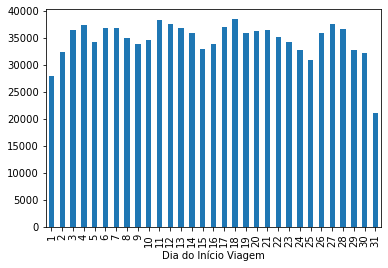

In [33]:
data_df['Viagem'].groupby(data_df["Dia do Início Viagem"]).agg('count').plot.bar()

<AxesSubplot:xlabel='Hora do Início Viagem'>

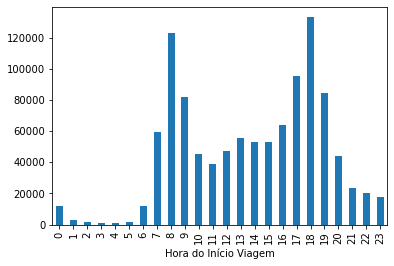

In [34]:
data_df['Viagem'].groupby(data_df["Hora do Início Viagem"]).agg('count').plot.bar()

<AxesSubplot:xlabel='Mês do Início Viagem'>

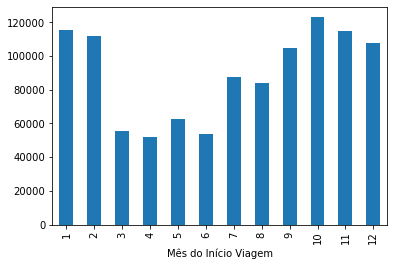

In [35]:
data_df['Viagem'].groupby(data_df["Mês do Início Viagem"]).agg('count').plot.bar()

* Tempo de viagem médio?
* Dias em que o tempo de viagem é maior?
* Quais os transportes públicos que 

In [36]:
data_df["Dia da Semana do Início Viagem"] = data_df["Hora Início Viagem"].dt.day_name()

In [37]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data_df['Dia da Semana do Início Viagem'] = pd.Categorical(data_df['Dia da Semana do Início Viagem'], categories=weekdays)
data_df = data_df.sort_values('Dia da Semana do Início Viagem')

In [38]:
df_hour_per_weekday= data_df.groupby(['Dia da Semana do Início Viagem', 'Hora do Início Viagem'])['Viagem'].count().to_frame()
df_hour_per_weekday

Viagem
Dia da Semana do Início Viagem Hora do Início Viagem        
Monday                         0                        1237
                               1                         305
                               2                         204
                               3                         172
                               4                         134
...                                                      ...
Sunday                         19                       4720
                               20                       3547
                               21                       2485
                               22                       2298
                               23                       1862

[168 rows x 1 columns]

In [39]:
df_hour_per_weekday.pivot_table(index='Dia da Semana do Início Viagem', columns='Hora do Início Viagem', values='Viagem', aggfunc='sum', fill_value=0)

Hora do Início Viagem,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dia da Semana do Início Viagem,,,,,,,,,,,,,,,,,,,,,
Monday,1237,305,204,172,134,323,2081,11329,23623,15090,...,8399,8035,9815,16759,24257,14230,6509,3046,2595,2334
Tuesday,1435,261,121,132,86,243,2032,11471,23922,15176,...,8359,8291,10045,16812,24364,14499,6902,3400,2987,2532
Wednesday,1503,343,167,134,160,291,2054,11295,23567,15245,...,8619,8257,10551,17044,25018,15227,6833,3484,3234,2606
Thursday,1558,282,144,125,112,291,2131,11144,23536,15547,...,8842,8496,10401,16711,24169,15027,7411,3649,2983,2450
Friday,1763,351,170,132,142,256,2221,10699,23365,14840,...,9338,8998,11419,17061,22989,14090,7852,4059,3214,3046
Saturday,2514,596,328,245,221,259,965,2134,3647,4157,...,5740,6474,6583,6573,7333,6859,4906,3226,2970,2830
Sunday,2234,580,355,268,248,230,646,1236,1726,2278,...,3828,4509,5025,4909,5121,4720,3547,2485,2298,1862


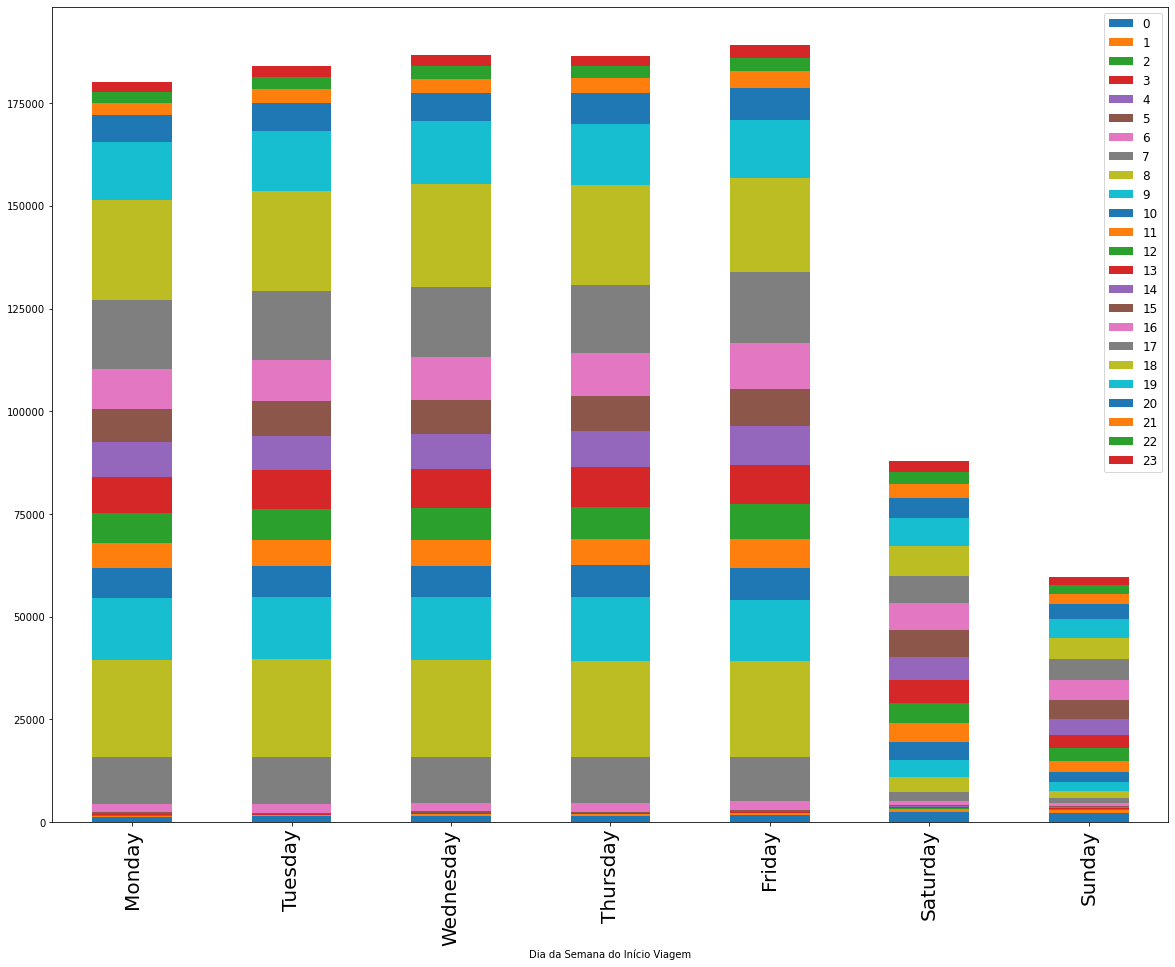

In [40]:
df_hour_per_weekday.pivot_table(index='Dia da Semana do Início Viagem', columns='Hora do Início Viagem', values='Viagem', aggfunc='sum', fill_value=0).plot.bar(stacked=True, figsize=(20, 15))
plt.xticks(fontsize=20)
plt.legend(prop={'size': 12})
plt.show()

In [41]:
df_start_zone = data_df.groupby(["Zona de Início Viagem"])['Viagem'].count().sort_values(ascending=False)
df_end_zone = data_df.groupby(["Zona de Fim Viagem"])['Viagem'].count().sort_values(ascending=False)

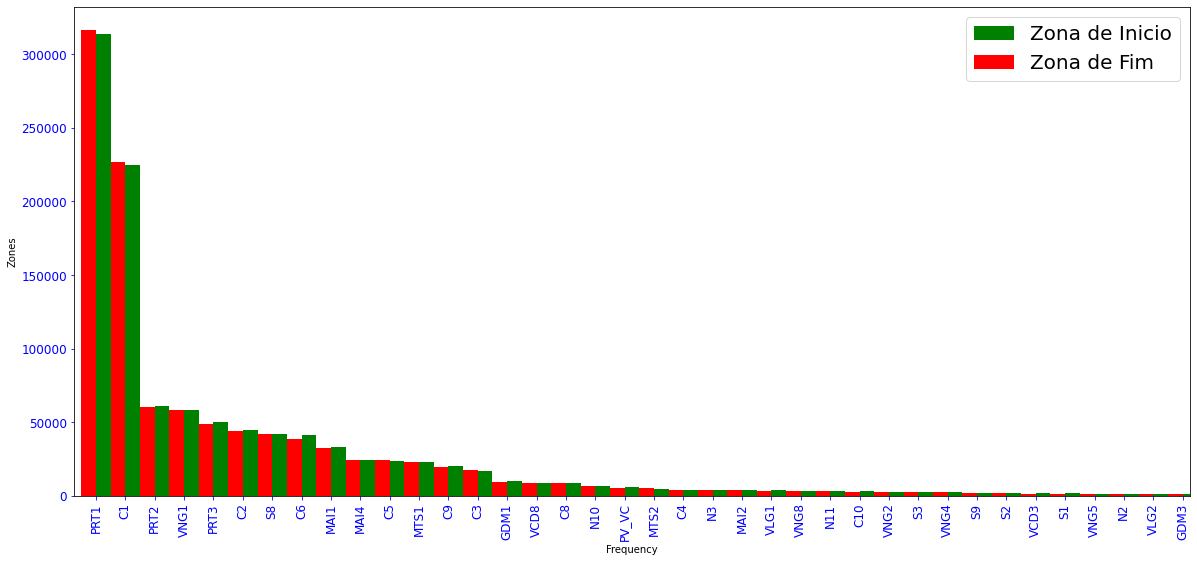

In [42]:
ax = plt.gca()
df_start_zone[df_start_zone > 1000].T.plot(label="Zona de Inicio", color='green', kind='bar', stacked=True, ax=ax, position=0, x='index',y='Viagem', figsize=(20, 9), fontsize=12)
df_end_zone[df_end_zone > 1000].T.plot(label="Zona de Fim", color='red', kind='bar', stacked=True, ax=ax, position=1, x='index',y='Viagem', figsize=(20, 9), fontsize=12)
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='blue')
ax.legend(fontsize=20)
plt.xlabel("Frequency")
plt.ylabel("Zones")
plt.show()

<AxesSubplot:ylabel='Zona de Início Viagem'>

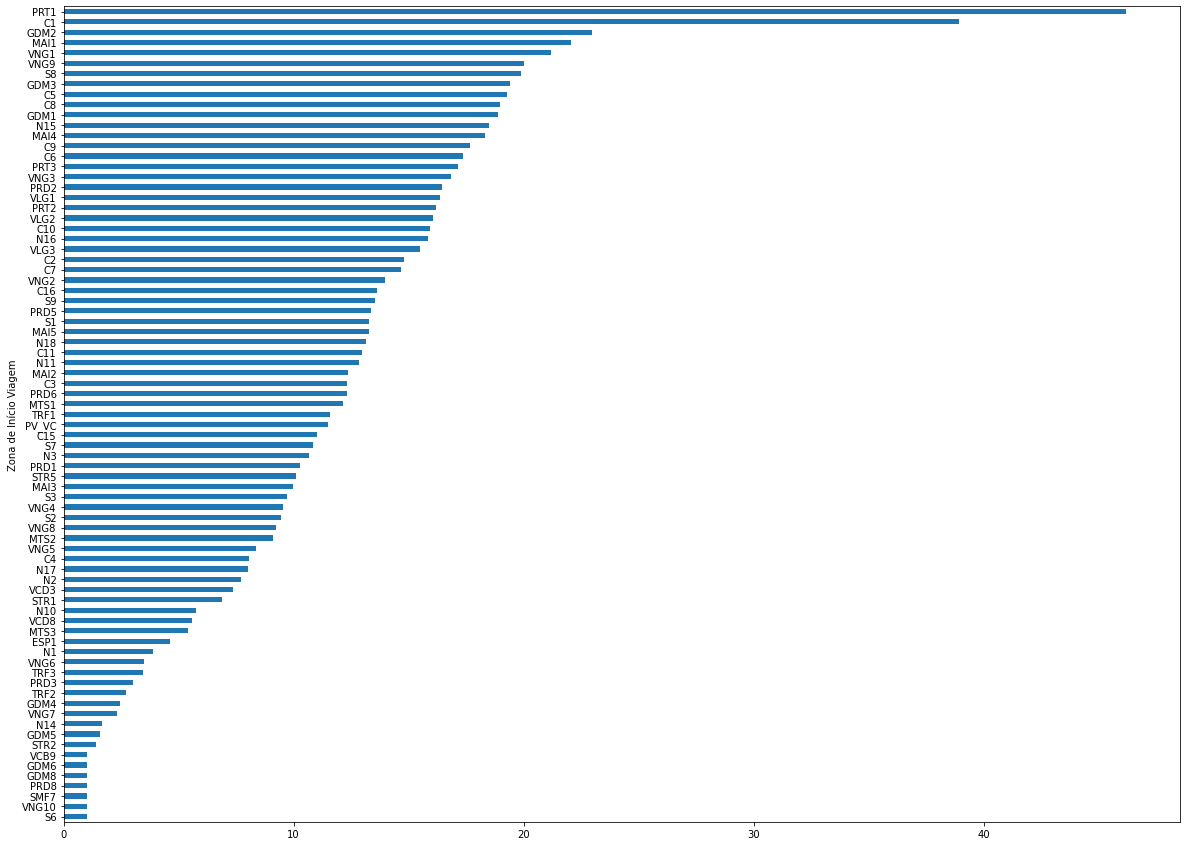

In [43]:
df_user_start_zone = data_df.groupby(["user_id", "Zona de Início Viagem"])['Viagem'].count().groupby("Zona de Início Viagem").mean().sort_values(ascending=True)
df_user_start_zone.plot.barh(x="Zona de Início Viagem", y = "index", figsize=(20, 15))